## Main program for the Linear Regression
### Salary Prediction
### Predict the salary values based on the years of experience

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
df = pd.read_csv(r"D:\Main tutorials Sunbeam\IIT-08-A-DS\Day_03\Day_03_2\code\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


In [5]:
df.describe() # it gives the statisticsl information about the dataset

,YearsExperience,Salary
count,33.000000,33.000000
mean,5.921212,82760.303030
std,3.342413,34014.620992
min,1.100000,37731.000000
25%,3.200000,56957.000000
50%,5.100000,67938.000000
75%,8.700000,109431.000000
max,13.000000,156000.000000


In [6]:
print("Check if their is any NaN values if yes then count it : ")
df.isna().sum()

Check if their is any NaN values if yes then count it : 


YearsExperience    0
Salary             0
dtype: int64

In [7]:
# spliting the data into x and y variables 
# x is input variable but with removed output column and y is output variable
x = df.drop('Salary' , axis = 1)

y = df['Salary'] # it is mandatory to get y as in 1D array or in Series

In [8]:
# dividing the data into training and testing format
# 80% for tarining and 20% for testing
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8 , random_state=123456)
# so here the actual testing data (actual values) is y_test which has come from the dataset
# and the x_test is predicted values.

In [15]:
# creating a model and assigning the values to it
model = LinearRegression()
model.fit(x_train , y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Model Predictions

In [16]:
# Now the next step is make the predictions
predict = model.predict([[16]]) # The predict function always expectes the input in the 2D array form and it returns the value iin the 1D array form.
# it always takes the input in the 2D form beacuse ML model think in the terms of rows and columns not in the terms of single rows  
print(f"The prediction for salary is : {predict[0]:.2f}")

The prediction for salary is : 183779.50


c:\Users\Atharv Patil\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
predictions = [[15] , [54] , [56] , [100]] # Here we created the 2d array to give input to the function
print(predictions)

[[15], [54], [56], [100]]


In [18]:
demoPrediction = model.predict(predictions)
print(f"The prediction is : {demoPrediction}")

The prediction is : [ 173751.46430678  564844.76785575  584900.83470442 1026134.30537506]


c:\Users\Atharv Patil\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
# Now predicting the values for the actual testing set 
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test , y_pred) # here the error is always found between the actual and predicted values.
# first the actual value is passed and then the predicted value is passed.
print(f"The mean absolute error for the model is : {mae}")

The mean absolute error for the model is : 2734.304777539491


In [21]:
mse = mean_squared_error(y_test , y_pred)
print(f"The mean squared error for the model is : {mse}")

The mean squared error for the model is : 9601570.176354375


In [22]:
rmse = np.sqrt(mse) # this is root mean squared error
print(f"The root mean squared error for the model is : {rmse}")

The root mean squared error for the model is : 3098.640052725449


In [23]:
from sklearn.metrics import r2_score
print(f"The R2 score of the model is : {r2_score(y_test , y_pred)}")

The R2 score of the model is : 0.9932427848341637


## EDA visualisation

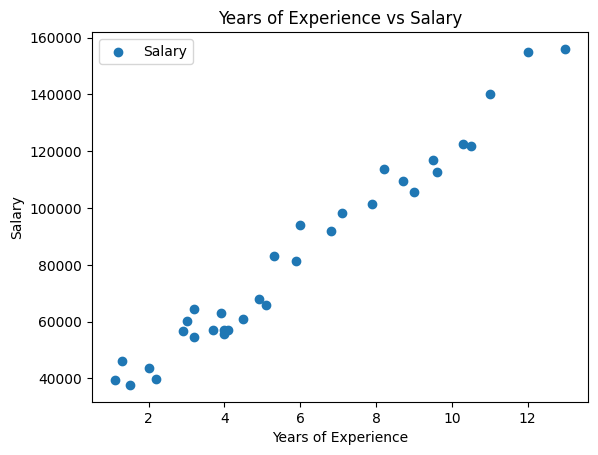

In [24]:
plt.scatter(df['YearsExperience'] , df['Salary'] , label = 'Salary') 
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.legend()
# in the above program the label is like the name tag.
# the legend() is displaying the name tag.
# if their is no label then their is no legend()

Text(0.5, 1.0, 'Years of Experience vs Salary')

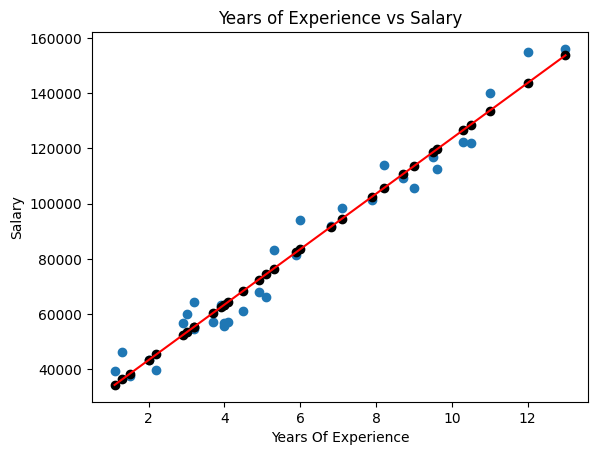

In [25]:
plt.scatter(df['YearsExperience'] , df['Salary'] , label = "Salary")
plt.plot(df['YearsExperience'] , model.predict(x) , label = "Best fit regression line" , color= "red")
plt.scatter(df['YearsExperience'] , model.predict(x) , color = "black") # x is passed to model.predict() because the code is plotting the regression line for the entire dataset, not just the test data.
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")

In [26]:
model.score(x , y)

0.9675467157702886